# <p style="text-align: center;">Work Samples</p>
## <p style="text-align: center;">Vishwa Bhuta</p>

## Matrix Factorization for Rating Prediction

The movielens dataset contains 1 million movie ratings from several thousand users. We will be using *k*-rank matrix factorization to estimate this dataset as the product $X=UV^T$, where *U* and *V* have only $k$ columns.

1) You can download the movielens 1M dataset from https://datahub.io/dataset/movielens. It has been split into training and test sets, and converted to matrix format where the rows correspond to users and the columns to movies. Note that most of the entries are NaNs, indicating that these ratings are missing.

2) Scikit-learn is a little behind for recommender systems, and doesn't have any method to factorize matrices with missing data. Which means you get to code it! You will have to:
* Set up initial guesses for the *U* and *V* matrices. I suggest small random values.
* Find a suitable learning rate for the descent. A learning rate that is too large will probably blow up.
* Come up with a stopping policy
* Code the descent algorithm

3) Using your SGD algorithm, apply 2-rank matrix factorization on the filled training matrix. Calculate the RMSE of this model on the training data and on the test data (separately). The optimal score on the training data is around .86 RMSE; your version of gradient descent must go at least below .91 RMSE.

4) You should notice some overfitting. Because matrix factorization learns separate scores for each movie, a movie with very few reviews may be easily overfit. You may want to only predict ratings when you have enough information to reach a good conclusion. Recalculate the RMSE on the test data, specifically for movies with at least 50 reviews (don't retrain the models). Also report the percent of movies that are still included (after cutting those with < 50 reviews), and the percent of test ratings that are still included.

5) Repeat steps 3 and 4 with 5-rank factorization. Display training and test RMSE.

In [1]:
import numpy as np
import pandas as pd
titles = pd.read_csv('lens1m_361M_titles.csv')
test_X = np.load('lens1m_361M_test.npy')
train_X = np.load('lens1m_361M_train.npy')

In [2]:
#creating the algorithm
class sgdMatrixFact():
    """Train a matrix factorization model to predict empty 
        entries in a matrix using stochastic gradient descent. 
        Params:
        K (int): number of latent features
        n_epochs (int): max number of epochs the model can run while training
        learning_rate (float): learning rate for SGD"""
    def __init__(self, K, n_epochs, learning_rate):
        self.K = K
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
    
    def fit(self,X_train):
        """The Fit function takes in a NxM matrix and returns 2 matrices, U and V, whose dot product
            is the approximation of the original matrix. It also returns a dictionary of the training
            RMSEs with each epoch"""
        self.X_train = X_train
        n, m = X_train.shape
        U = np.random.rand(n,self.K)/1000
        V = np.random.rand(m,self.K)/1000
        V = V.T #transpose V matrix
        
        train_rmse = {}
        for epoch in range(self.n_epochs):
            print "Working on epoch",epoch
            for i in xrange(len(X_train)):
                for j in xrange(len(X_train[i])):
                    if X_train[i][j]>0:
                        L = X_train[i,j] - np.dot(U[i,:],V[:,j])  # Calculate error for gradient
                        for k in range(self.K):
                            U[i][k] = U[i][k] + self.learning_rate*(2*L*V[k][j]) # Update latent U feature matrix
                            V[k][j] = V[k][j] + self.learning_rate*(2*L*U[i][k]) # Update latent V feature matrix
        
            X_hat = np.dot(U,V)
            rmse = np.sqrt(np.nanmean((X_train - X_hat)**2))
            train_rmse[epoch]=rmse
            try:
                if train_rmse[epoch-1]-rmse <= 0.001:
                    break #Stopping rule: break loop if rmse between epochs isn't improving
            except:
                pass
        
        self.train_rmse = train_rmse
        self.U = U
        self.V = V
        V = V.T #transpose V matrix back to normal
        return U,V,train_rmse
    
    def predict(self,X_test):
        """The Predict function uses the U and V matrices derived from the training matrix 
            and uses it to approximate empty entries in a testing matrix of the same shape. 
            Returns the approximated matrix and the test RMSE."""
        X_hat = np.dot(U,V.T)
        test_rmse = np.sqrt(np.nanmean((X_test - X_hat)**2))
        
        self.X_hat = X_hat
        self.test_rmse = test_rmse
        return X_hat,test_rmse      


In [3]:
#cross-validating to find an appropriate learning rate
learning_rate = np.linspace(0.01,0.001,15)
cross_val = {}
for l in learning_rate:
    mod = sgdMatrixFact(K=2,n_epochs = 5,learning_rate = l)
    U,V,rmse =  mod.fit(train_X)
    cross_val[l]=rmse

Working on epoch 0
Working on epoch 1


C:\Users\Vishwa\Anaconda2\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Working on epoch 2
Working on epoch 3
Working on epoch 4
Working on epoch 0
Working on epoch 1
Working on epoch 2
Working on epoch 3
Working on epoch 4
Working on epoch 0
Working on epoch 1
Working on epoch 2
Working on epoch 3
Working on epoch 4
Working on epoch 0
Working on epoch 1
Working on epoch 2
Working on epoch 3
Working on epoch 4
Working on epoch 0
Working on epoch 1
Working on epoch 2
Working on epoch 3
Working on epoch 4
Working on epoch 0
Working on epoch 1
Working on epoch 2
Working on epoch 3
Working on epoch 4
Working on epoch 0
Working on epoch 1
Working on epoch 0
Working on epoch 1
Working on epoch 0
Working on epoch 1
Working on epoch 0
Working on epoch 1
Working on epoch 2
Working on epoch 3
Working on epoch 4
Working on epoch 0
Working on epoch 1
Working on epoch 2
Working on epoch 3
Working on epoch 4
Working on epoch 0
Working on epoch 1
Working on epoch 2
Working on epoch 3
Working on epoch 4
Working on epoch 0
Working on epoch 1
Working on epoch 2
Working on e

In [4]:
#Since learning rate of 0.004 had the best RMSE, we use that, but increase the number of epochs to improve RMSE further.
#large number of epochs since stopping rule will take care of it if there are too many
mod = sgdMatrixFact(K=2,n_epochs = 20,learning_rate = 0.0042142857142857138) 
U,V,rmse =  mod.fit(train_X)
x_hat,test_rmse = mod.predict(test_X)

Working on epoch 0
Working on epoch 1
Working on epoch 2
Working on epoch 3
Working on epoch 4
Working on epoch 5
Working on epoch 6
Working on epoch 7
Working on epoch 8
Working on epoch 9
Working on epoch 10
Working on epoch 11
Working on epoch 12
Working on epoch 13
Working on epoch 14
Working on epoch 15
Working on epoch 16
Working on epoch 17
Working on epoch 18
Working on epoch 19


In [5]:
print rmse
print test_rmse

{0: 2.5847790410478253, 1: 1.0012741401588485, 2: 0.93832217698040454, 3: 0.92955085858233755, 4: 0.92573497953761441, 5: 0.92365669427811337, 6: 0.92227537722276642, 7: 0.92098104343462051, 8: 0.91898879987833881, 9: 0.91525068528916198, 10: 0.90990512467290396, 11: 0.9046258519122623, 12: 0.90007217469601042, 13: 0.89631658652416624, 14: 0.89336419191185357, 15: 0.89109710775621731, 16: 0.88935965770263214, 17: 0.88801549004491898, 18: 0.88696137696163013, 19: 0.88612385725623921}
0.910543535132


In [6]:
#remove columns (movies) with fewer than 50 reviews, as they are too sparse and can lead to overfitting
cols_to_use=[]
for col in range(test_X.shape[1]):
    if len(test_X[:,col][np.isfinite(test_X[:,col])])>=50:
        cols_to_use.append(col)

test_X_50 = test_X[:,cols_to_use]

In [7]:
x_hat_50 = x_hat[:,cols_to_use]
print "Test RMSE for Movies with over 50 reviews:", np.sqrt(np.nanmean((test_X_50 - x_hat_50)**2))

Test RMSE for Movies with over 50 reviews: 0.901313838222


In [8]:
print "Percent of movies still included: {:.2f}%".format((float(test_X_50.shape[1])/test_X.shape[1])*100)
print "Percent of ratings still included: {:.2f}%".format((float(len(test_X_50[np.isfinite(test_X_50)]))/len(test_X[np.isfinite(test_X)]))*100)

Percent of movies still included: 30.79%
Percent of ratings still included: 81.19%


In [9]:
#re-running algorithm with 5-rank matrix factorization (ie. with 5 latent features)
mod1 = sgdMatrixFact(K=5,n_epochs = 20,learning_rate = 0.0042142857142857138) 
U1,V1,rmse1 =  mod.fit(train_X)
x_hat1,test_rmse1 = mod.predict(test_X)

Working on epoch 0
Working on epoch 1
Working on epoch 2
Working on epoch 3
Working on epoch 4
Working on epoch 5
Working on epoch 6
Working on epoch 7
Working on epoch 8
Working on epoch 9
Working on epoch 10
Working on epoch 11
Working on epoch 12
Working on epoch 13
Working on epoch 14
Working on epoch 15
Working on epoch 16
Working on epoch 17
Working on epoch 18


In [10]:
print rmse1
print test_rmse1

{0: 2.5871217438647385, 1: 1.0011875562054089, 2: 0.93828832770346104, 3: 0.92950149835883622, 4: 0.9255961807861498, 5: 0.92318133681420578, 6: 0.92063777572287198, 7: 0.91636914367873568, 8: 0.91065004904367131, 9: 0.90587371916023884, 10: 0.90214822813456752, 11: 0.89902206063440537, 12: 0.89636812571023283, 13: 0.89410958901744819, 14: 0.89218386921167148, 15: 0.890545048470338, 16: 0.88915928158941193, 17: 0.88799822020157559, 18: 0.88703498683374316}
0.910543535132


In [11]:
x_hat1_50 = x_hat1[:,cols_to_use]
print "Test RMSE for Movies with over 50 reviews:", np.sqrt(np.nanmean((test_X_50 - x_hat1_50)**2))

Test RMSE for Movies with over 50 reviews: 0.901313838222


## MNIST
In this question you classify hand-written digits. We want to use MNIST data set and try Multi-layer Perceptron (MLP) classifier using sklearn package in Python. In order to simplify the problem, we classify digits into 8 classes (digits 0,1,2,...7) and ignore records for digits 8 and 9.  Use the code below to access the data set and extract data with labels 0 to 7, and split the data set into train set and test set.

1. Fit a Multilayer Perceptron Classifier using the standard options on sklearn's MLP on train data. Report the root MSE for both train and test data.
                    
2. To find better parameters for the MLP Classifier model, try an exhaustive search over all parameters of the data. Use sklearn's GridSearchCV to find the best subset of parameters from the set:
                    { alpha = [0.1,0.01,0.001], activation : ['logistic', 'relu'] }
    Which parameters resulted in a more accurate model? Can you explain why? 

3. Select 5 misclassified images and display them.

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.neural_network import MLPClassifier
%matplotlib inline

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X = (mnist.data / 255.)[:48200]
y = mnist.target[:48200]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MLP = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', \
                   verbose=10, tol=1e-4, random_state=42,learning_rate_init=.1)
mod_fit = MLP.fit(X_train,y_train)
mod_pred_is = mod_fit.predict(X_train)
mod_pred_os = mod_fit.predict(X_test)
print("Training set score defaults Params: %f" % MLP.score(X_train, y_train))
print("Test set score defaults Params: %f" % MLP.score(X_test, y_test))

Iteration 1, loss = 0.24522635
Iteration 2, loss = 0.10589741
Iteration 3, loss = 0.07488529
Iteration 4, loss = 0.05895084
Iteration 5, loss = 0.04782934
Iteration 6, loss = 0.03945315
Iteration 7, loss = 0.03320940
Iteration 8, loss = 0.02872414
Iteration 9, loss = 0.02451143
Iteration 10, loss = 0.02132893


C:\Users\Vishwa\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Training set score defaults Params: 0.995620
Test set score defaults Params: 0.980290


In [14]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.1,0.01,0.001], 'activation':['logistic', 'relu']}
crossVal = GridSearchCV(MLPClassifier(), params)
CVModel = crossVal.fit(X_train,y_train)

In [15]:
CVmod_pred_os = CVModel.predict(X_test)
print("Test set score w/CV Params: %f" % CVModel.score(X_test, y_test))
print "Best Params:", CVModel.best_params_

Test set score w/CV Params: 0.983817
Best Params: {'alpha': 0.1, 'activation': 'relu'}


#### Explanation

Given the accuracy score, we see the model with the cross-validated parameters do better (albeit only very slightly). The cross-validation shows, as you see above, that the best parameters are alpha=0.1 (compared to 0.0001 in default) and activation='relu' (same as default). This means that we have increased our regularization penalty, which decreases the possibility of overfitting, thereby increasing our out-of-sample accuracy. In terms of the activation, relu (the default parameter) was also found to be the best in cross-validation. The ReLU function maps negative inputs to 0 and positive outputs to f(x) = x, whereas the logistic function has a sigmoid threshold. One of the differences between relu and logistic activation function is that relu is faster at learning due to its constant gradient (not vanishing gradient like in logistic), which can be better for us here since we're only doing 10 iterations (probably why this was chosen to be better)

In [16]:
wrong_image_index = []
wrong_image_pred = []
wrong_image_actual = []
for i,pred in enumerate(CVmod_pred_os):
    if pred != y_test[i]:
        wrong_image_index.append(i)
        wrong_image_pred.append(pred)
        wrong_image_actual.append(y_test[i])

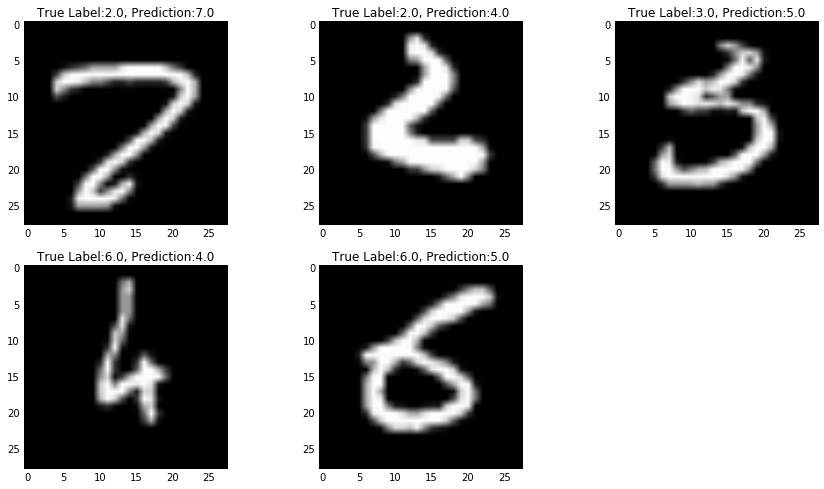

In [17]:
import pandas as pd
import numpy as np
import matplotlib

fig = plt.figure(figsize=(15, 8))

for i,pixels in enumerate(X_test[wrong_image_index[:5]]):
    image = pixels.reshape((28, 28))
    # Plot
    ax = fig.add_subplot(2,3,i+1)
    ax.set_title('True Label:{label}, Prediction:{pred}'.format(label=wrong_image_actual[i], pred=wrong_image_pred[i]))
    ax.imshow(image, cmap='gray')

plt.show()


## Text Analytics

In this assignment you are an analytics consultant to a (i) brand manager, (ii) product manager and (iii) advertising manager. Your job is to give advice/insights to these individuals based on the analysis of social media conversations. We use cars as an example of a “high involvement” good (for high involvement goods, people use social media heavily for awareness building and research). Our data is fetched from an Edmunds forum discussing entry level luxury sedans. 

We are looking at Lifts (ie. the probability that two words co-occur, as opposed to occuring otherwise) to tell us which brands are likely to be compared to each other. This can be useful, but does not point us to the sentiments expressed in the mentions.

In [18]:
# Import Statements - Basic
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from collections import defaultdict
import itertools
import sys
import operator

# # Import Statements - nltk
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk import collocations
from nltk import sentiment
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

C:\Users\Vishwa\Anaconda2\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


#### Brand Comparisons
Find the top 10 brands from frequency counts.  Be sure not to count a mention more than once per post, even if it is mentioned multiple times. Replace models with brands so that from now on you have to deal with only brands and not models.This step is meant to help simplify the analysis. A list of model and brand names (not exhaustive) are provided in a separate file.   

In [21]:
# Function to clean up make/model list
def clean(cell):
    cell = cell.lower().rstrip('\xa0')
    return cell

# Create Brand List and Attribute List for Replacements
model_brand = pd.read_csv('cars make model list.csv',header=None, names = ['brand','model'])

model_brand = model_brand.applymap(clean)
carlookupdict = model_brand.set_index('model').to_dict()
carlookupdict = carlookupdict['brand']

brands = list(model_brand['brand'].drop_duplicates())
brands.remove('car')
brands.remove('seat')
brands.remove('problem')
brands.remove('sedan')

# Key attributes were considered to be performance, price, features, country (German, American, etc.) and words that
## fit under that category will be replace with the key attribute
attribute_list = pd.read_csv('attribute list.csv', header=None, names = ['word', 'replace'])
attributelookupdict = attribute_list.set_index('word').to_dict()
attributelookupdict = attributelookupdict['replace']

# Function to Tokenize Words 
def tokenize(line):
    
    stops = list(set(stopwords.words('english'))) # create list of unique stopwords
    tokenizer = RegexpTokenizer(r'\w+') # create tokenizer to remove punctuation
    
    list_of_words = list(set(tokenizer.tokenize(line)))
    list_of_words = [w for w in list_of_words if w not in stops]
    
    return list_of_words
    

In [22]:
# Function to read each line
def read_input(file):
    for line in file:
        # split the line into individual fields (fields are delimited by tab).
        yield line.lower().strip().split(',',2)

# Function to compile word dictionary with each review the word appears in
def main():
    # input comes from STDIN (standard input)
    # data is the generator that produces individual inputs
    data = read_input(INPUT)
    worddict = {}
    i=0
    for line in data:
        try:
            comment = line[2]
        except IndexError:
            continue
            
        wordlist = (tokenize(comment))
        
        for word in set(wordlist):  #replace names of models with names of brands to simplify
            if word in carlookupdict.keys():
                word = carlookupdict[word] 
            if word in attributelookupdict.keys():
                word = attributelookupdict[word]
                
            if word in worddict.keys(): #check if index is first a value of word key before adding
                if i not in worddict.get(word):
                    worddict[word].append(i)
            else:
                worddict[word] = [i]
        i += 1
    return worddict        

In [23]:
# Function to get frequency counts for each word (number of reviews they appear in)
def get_freq(d):
    
    freq_dict = {}
    for word in d.keys():
        freq_dict[word] = len(d[word])
    
    word_freq = freq_dict.items()
    word_freq.sort(key=operator.itemgetter(1),reverse=True)
    
    return word_freq


In [24]:
# Function to calculate lift of pairs of words, output is a dataframe 
def get_lift(items, freq_dict):
    lifts = pd.DataFrame(data=None,index=items,columns=items) # initialize empty DF of square matrix
    
    N = max([item for sublist in freq_dict.values() for item in sublist])  # store number of observations total
    
    for a, b in itertools.combinations(items, 2): # for each combination of items in list (no repeats):
        count_x = len(freq_dict[a]) # get count of x
        count_y = len(freq_dict[b]) # get count of y
        overlap = len(list(set(freq_dict[a]) & set(freq_dict[b]))) # get count of (x+y) as intersect of index lists

        lifts[b][a] = (1.0*overlap*N)/(count_x*count_y) # calc lift and store
            
    return lifts

In [25]:
# simple fn to create array from the lift matrix
def build_ds_matrix(lift_matrix):
    mda = np.zeros(shape = lift_matrix.shape) # initialize square array of zeroes 
    
    # loop through each row/col in lift matrix and do the following:
    for i in range(0,len(lift_matrix)):
        for j in range(i,len(lift_matrix)):
            if i == j:
                mda[i,j] = 0 # set the diagonal = 0 (bmw = bmw --> dissimilarity/distance is 0)
            else:
                mda[i,j] = (1.0)/lift_matrix[lift_matrix.columns[j]][i] # grab 1/lift
                mda[j,i] = (1.0)/lift_matrix[lift_matrix.columns[j]][i] # grab 1/lift for the opposite location since it's the same
            
    return mda

In [26]:
# Create word dictionary from reviews
INPUT = open('forum_messages.csv', 'r')
worddict = main()

C:\Users\Vishwa\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [27]:
# Get word frequencies for each word in the set of reviews
word_freq = get_freq(worddict)
top_brands = [t for t in word_freq if t[0] in brands]

Identify top 10 brands by frequency. From the posts, calculate lift ratios for associations between the brands. You will have to write a script to do this task). Show the brands on a multi-dimensional scaling (MDS) map. 

In [28]:
# Gather the top 10 brands
top_brands[:10]

[('bmw', 5361),
 ('acura', 2236),
 ('audi', 2156),
 ('honda', 1622),
 ('infiniti', 1579),
 ('toyota', 1100),
 ('nissan', 771),
 ('volkswagen', 606),
 ('mercedes-benz', 584),
 ('ford', 554)]

In [29]:
top_10_brands = [x[0] for x in top_brands[:10]]

In [30]:
df_brand_freq = pd.DataFrame(top_brands)
df_brand_freq.columns = [['Brand', 'Frequency']]
df_brand_freq = df_brand_freq.set_index('Brand')
df_brand_freq

,Frequency
Brand,
bmw,5361
acura,2236
audi,2156
honda,1622
infiniti,1579
toyota,1100
nissan,771
volkswagen,606
mercedes-benz,584


In [31]:
liftmat = get_lift((top_10_brands), worddict)
liftmat_dash = liftmat.copy()
liftmat_dash.fillna('-', inplace=True)
liftmat_dash

,bmw,acura,audi,honda,infiniti,toyota,nissan,volkswagen,mercedes-benz,ford
bmw,-,1.38374,1.70812,1.24865,1.79306,1.48443,1.21345,1.45133,2.16601,1.49901
acura,-,-,2.21719,3.24237,2.97951,1.70314,2.03764,1.81609,2.30169,1.4103
audi,-,-,-,1.60077,2.38377,1.52872,1.25439,3.82447,3.37177,1.50982
honda,-,-,-,-,1.51093,3.70604,3.33472,2.42712,2.12193,2.5086
infiniti,-,-,-,-,-,1.89267,3.50268,1.90427,2.99456,1.46025
toyota,-,-,-,-,-,-,4.14196,2.1417,2.74874,2.89759
nissan,-,-,-,-,-,-,-,2.69376,1.8774,2.50681
volkswagen,-,-,-,-,-,-,-,-,2.91937,3.13341
mercedes-benz,-,-,-,-,-,-,-,-,-,2.67083
ford,-,-,-,-,-,-,-,-,-,-


In [32]:
#Building the MDS map
mda = build_ds_matrix(liftmat)

# import package
from sklearn.manifold import MDS

# initialize fit object 
mds1 = MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=1, random_state=None, dissimilarity='euclidean')
md_coords = mds1.fit_transform(mda)


C:\Users\Vishwa\Anaconda2\lib\site-packages\sklearn\manifold\mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


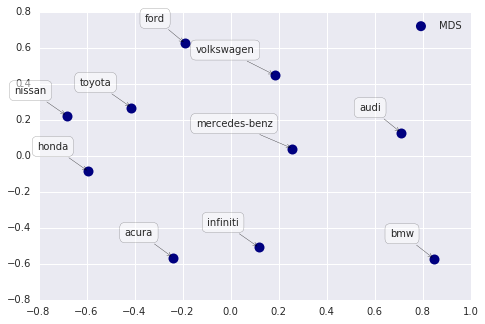

In [33]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

labels = top_10_brands

s = 100
plt.scatter(md_coords[:, 0], md_coords[:, 1], color='navy', s=s, lw=0,
            label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)


for label, x, y in zip(labels, md_coords[:, 0], md_coords[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

From this MDS chart, we can see that Acura and Infiniti are often compared to each other.  That being said, customers may be likely to switch between the two brands. We can also see the three major Japanese value brands - Honda, Nissan, and Toyota - all located near each other and away from the European luxury brands (BMW, Audi, etc.).

#### Attribute-brand lifts
What are 5 most frequently mentioned attributes of cars in the discussions? Note that the same attribute may be described by different words – e.g., pick-up and acceleration may both refer to a more general attribute, “performance”. We made these replacements above. Now pick the 5 most frequently mentioned brands. Which attributes are most strongly associated with which of these 5 brands?

In [34]:
top_words = [t for t in word_freq]
top_words.sort(key=lambda x: x[1], reverse=True)

The 5 most important features for a car:
1. Performance (8,000+ mentions)
2. Quality (6,800+ mentions)
3. Features (5,500+ mentions)
4. Price (4,600+ mentions)
5. Fuel/Oil Efficiency (1,400+ mentions)  

Comparing these with the top 5 brands:
1. BMW
2. Acura
3. Audi
4. Honda
5. Infiniti

In [35]:
att_brand_lift = get_lift(('performance', 'quality', 'features', 'price', 'fuel', 'bmw', 'acura', 'audi', 'honda', 'infiniti'), worddict)
att_brand_lift.fillna('-')
att_brand_lift = att_brand_lift[['bmw', 'acura', 'audi', 'honda', 'infiniti']]
att_brand_lift[:5]

,bmw,acura,audi,honda,infiniti
performance,1.38614,1.34758,1.40966,1.39327,1.41321
quality,1.36742,1.50347,1.54005,1.59784,1.50851
features,1.41186,1.40803,1.6255,1.40767,1.56633
price,1.59891,1.6806,1.66132,1.62023,1.82768
fuel,1.39915,1.18501,1.36961,1.71486,1.71147


Given only these lift scores, we cannot know the sentiment associated with the attributes.  If we were to assume a positive sentiment, it seems that customers would associate high performance with Infiniti, high quality with Honda, diversity of features with Audi, good price with Infiniti, and fuel efficiency with Infiniti.   If a brand has a high lift score with any of these attributes, the advertising/marketing manager could reiterate these attributes in campaigns or promotions.  The low lift scores of fuel, features, quality, or performance could alert the product manager that those areas need improvement.

Another way an advertising manager could use this information is to compare itself to a similar brand and exploit its strengths over the similar brand.  For example, in the lift chart and MDS map we saw that Acura and Infiniti were often compared together in messages.  For an advertising manager at Infiniti, they could capitalize on this by targeting their ads comparing themselves to Acura and all of the ways they are superior.  According to the attribute lift scores above, Infiniti is more often described by performance, quality, features, and fuel.  Assuming positive sentiment, this is a great way for promoting your own product and differentiating yourself to customers who are choosing between the two brands.
